In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

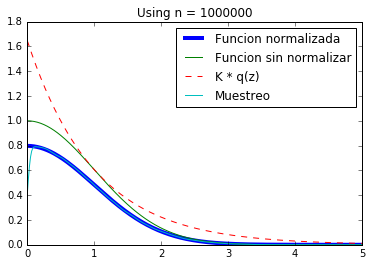

In [2]:
k = np.sqrt(np.exp(1))

def q(z):
    return np.exp(-z)

def draw_q(n):
    return rd.exponential(size=n)

def pt(z):
    return np.exp((-z ** 2) / 2.0)

def uni(z0):
    return rd.uniform(0, k * q(z0))

vec_uni = np.vectorize(uni)

def reject(N):
    samples = draw_q(N)
    u = vec_uni(samples)
        
    prob = pt(np.array(samples))
    valid = []
    for i in range(N):
        if (u[i] <= prob[i]):
            valid.append(samples[i])
    # print ('Accepted', len(valid) / N)
    return valid

def esti2(N):
    samples = reject(N)
    return stats.gaussian_kde(samples)

x = np.linspace(0, 5, 300)

Nexp = [1000000]

def pz(z):
    return (2.0 / np.sqrt(2.0 * np.pi)) * np.exp(- (z ** 2) / 2.0)

vec_pz = np.vectorize(pz)

for n in Nexp:
    plt.plot(x, vec_pz(x), label='Funcion normalizada', linewidth=4)
    plt.plot(x, pt(x), label='Funcion sin normalizar')
    plt.plot(x, k * q(x), '--',label='K * q(z)')
    kernel = esti2(n)
    y = kernel(x)
    plt.plot(x, y, 'c',label='Muestreo')
    plt.title("Using n = %d" % (n))
    plt.legend()
    plt.show()
